### 1) Overall configurations

In [1]:
import sys

sys.path.append( '../slevelsutil/' )

import request_track_util as rtrack
from Instance import Instance
from ResultTripServiceLevel import ResultTripServiceLevel

### 2) Loading the instance data

In [2]:
test_case = "standard_vs_enforce_BB"
instance_settings_path = "C:/Users/LocalAdmin/IdeaProjects/slevels/src/main/resources/day/enforce_sl_all_hierachical_scenarios_150_plus.json"
data_dict_path = "../data/dictionary/request_track_data_dictionary_plus.json"

instance = Instance(test_case, instance_settings_path, data_dict_path)
tripdata = ResultTripServiceLevel(instance)
tripdata.df_all

,Pickup waiting (min),SQ Class,Service,Pickup deadline,Policy,deviation
0,71,Standard,Company,Achieved,Enforce SL + Hire,0
1,32,Standard,Company,Achieved,Enforce SL + Hire,0
2,75,Low-cost,Company,Achieved,Enforce SL + Hire,0
3,30,Standard,Company,Achieved,Enforce SL + Hire,0
4,61,Standard,Company,Achieved,Enforce SL + Hire,0
...,...,...,...,...,...,...
14229,159,Standard,Company,Achieved,Min. waiting,0
14230,32,Standard,Company,Achieved,Min. waiting,0
14231,200,Standard,Company,Achieved,Min. waiting,0
14232,252,Business,Company,Violated,Min. waiting,72


In [3]:
figure_name_box_plot = "grid_boxplot_pickup_waiting.pdf"
fig_boxplot_filepath = f'{instance.paper_folder}{test_case}_{figure_name_box_plot}'

In [4]:
rejected_count_class_method = tripdata.get_rejected_value_counts_dict(["class"], "method")
rejected_count_class_method

{('Business', 'Enforce SL'): 34,
 ('Low-cost', 'Min. waiting'): 317,
 ('Low-cost', 'Enforce SL'): 52,
 ('Standard', 'Min. waiting'): 232,
 ('Standard', 'Enforce SL'): 176}

In [5]:
rejected_count_class_method = tripdata.get_rejected_value_counts_dict(["class"], "method")
rejected_count_class_method

{('Business', 'Enforce SL'): 34,
 ('Low-cost', 'Min. waiting'): 317,
 ('Low-cost', 'Enforce SL'): 52,
 ('Standard', 'Min. waiting'): 232,
 ('Standard', 'Enforce SL'): 176}

Business (#Rides = 6,831)
Standard (#Rides = 29,151)
Low-cost (#Rides = 6,720)
saving at C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/sqc/business_class_amod/trc/plus/standard_vs_enforce_BB_grid_boxplot_pickup_waiting.pdf


<Figure size 432x288 with 0 Axes>

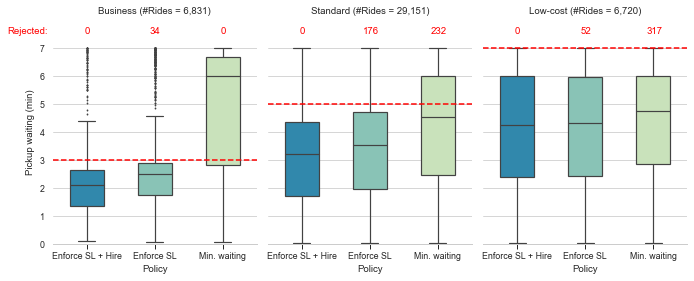

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(
    "whitegrid", {
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': False,
        'ytick.right': False
    }
)
sns.set_context("paper")
sns.despine(left=True)

YlGnBu_r = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0', '#7fcdbb', '#c7e9b4', '#ffffd9']
palette = sns.color_palette(YlGnBu_r)

# type_plot = dict(cut=0, kind="violin")
type_plot = dict(kind="box", fliersize=1, width=0.5)


g = sns.catplot(
    **type_plot,
    x=instance.headers["method"],
    y=instance.headers["delay_pk"],
    col=instance.headers["class"],
    data=tripdata.df_serviced,
    col_order=instance.order_classes,
    order = instance.order_methods_dict.keys(),
    height=4,
    aspect=0.8,
    palette=palette[3:]
)

kws = {"color":"red", "linewidth":1.5, "linestyle": "--"}

def plot_expected_lines(facet_axes, line_kws):
    def expected_line(*args, **kwargs):
        sq_class, methods = [list(set(a)) for a in args]
        sq_class = sq_class[0]
        plt.axhline(instance.sl_class_target_pickup[sq_class], **kwargs)

    facet_axes = (facet_axes.map(expected_line, instance.headers["class"], instance.headers["method"], **line_kws))
    return facet_axes

def plot_rejected_tags(facet_axes, tag_kws):
    def rejected_tags(*args, **kwargs):
        sq_class, methods = [list(set(a)) for a in args]
        sq_class = sq_class[0]
        for m in methods:
            x_index_method = instance.order_methods_dict[m]
            x_pos = x_index_method
            rejected = rejected_count_class_method.get((sq_class, m),0)
            if kwargs['label']:
                label = f"{kwargs['label']} = {rejected:,}"
                x_pos -= len(kwargs['label'])/30
            else:
                label = f"{rejected:,}"
            plt.text(x_pos - len(label)/30, kwargs['rejected_y_pos'], label ,color="red")
    facet_axes = (facet_axes.map(rejected_tags, instance.headers["class"], instance.headers["method"], **tag_kws))
    return facet_axes

g = plot_expected_lines(g,kws)
rejected_y_pos = 450
g = plot_rejected_tags(g, {"label":None, "rejected_y_pos":rejected_y_pos})
#g = plot_rejected_tags(g, {"label":"Rejected"})
g = rtrack.add_ticks(g, 0, 480, 60, label_min=0, label_max=9, label_step=1)
g.set_axis_labels(instance.headers["method"], instance.headers["delay_pk"])
g = g.set_titles("{col_name}")

for i_method, sqc in enumerate(instance.order_classes):
    g.facet_axis(0, i_method).set_title(f"{sqc} (#Rides = {tripdata.sq_class_count[sqc]:,})")
    g.facet_axis(0, i_method).margins(0)
    g.facet_axis(0, i_method).set_ylim(0,480)
    print(g.facet_axis(0, i_method).get_title())

plt.text(-7.5, rejected_y_pos, "Rejected:" ,color="red")
sns.despine(left=True)

print("saving at", fig_boxplot_filepath)
plt.savefig(fig_boxplot_filepath, bbox_inches="tight")